In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import networkx as nx
# %%
# Load dataset from local file path
df = pd.read_csv('/political_social_media.csv', encoding='latin-1')
# Or try other encodings like 'iso-8859-1', 'cp1252' if 'latin-1' doesn't work.
# The 'encoding' argument specifies the encoding of the file.

# Check if dataset is loaded correctly
if not df.empty:
    # Data Preprocessing
    nltk.download('stopwords')
    nltk.download('punkt')
    # Download the punkt_tab data package
    nltk.download('punkt_tab') # This line downloads the necessary data

    def clean_text(text):
        if pd.isnull(text):
            return ''
        text = str(text).lower()
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


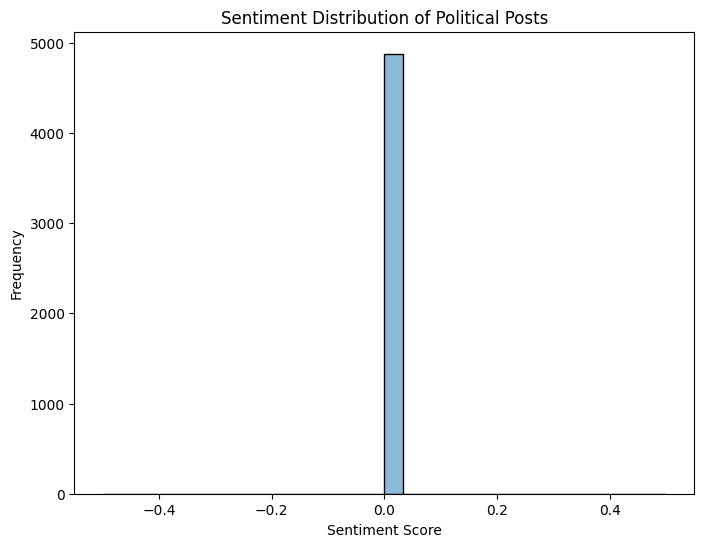

Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       976

    accuracy                           1.00       976
   macro avg       1.00      1.00      1.00       976
weighted avg       1.00      1.00      1.00       976

User or message column missing for influencer analysis.
Engagement data not found in dataset.
Analysis complete: Sentiment trends and influencer impact visualized.


In [17]:
# Load dataset from local file path
df = pd.read_csv('/political_social_media.csv', encoding='latin-1')
# Or try other encodings like 'iso-8859-1', 'cp1252' if 'latin-1' doesn't work.
# The 'encoding' argument specifies the encoding of the file.

# Check if dataset is loaded correctly
if not df.empty:
    # Data Preprocessing
    nltk.download('stopwords')
    nltk.download('punkt')

    def clean_text(text):
        if pd.isnull(text):
            return ''
        text = str(text).lower()
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        return ' '.join(tokens)

    df['cleaned_text'] = df['message'].apply(clean_text)

    # Drop empty rows after cleaning
    df = df[df['cleaned_text'].str.strip() != '']

    # Sentiment Analysis
    def get_sentiment(text):
        return TextBlob(text).sentiment.polarity

    df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

    # Visualizing Sentiment Distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df['sentiment'], bins=30, kde=True)
    plt.title("Sentiment Distribution of Political Posts")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.show()

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)

    # Text Vectorization
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

    # Train Sentiment Classification Model
    model = MultinomialNB()
    model.fit(X_train_tfidf, np.sign(y_train))  # Convert sentiment polarity to -1, 0, or 1

    # Evaluate Model
    X_test_counts = vectorizer.transform(X_test)
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)
    y_pred = model.predict(X_test_tfidf)
    print("Accuracy:", accuracy_score(np.sign(y_test), y_pred))
    print(classification_report(np.sign(y_test), y_pred))

    # Influencer Analysis (Network Graph)
    if 'user' in df.columns and 'message' in df.columns:
        G = nx.Graph()
        for _, row in df.iterrows():
            G.add_edge(row['user'], row['message'])
        plt.figure(figsize=(10, 6))
        nx.draw(G, with_labels=False, node_size=10)
        plt.title("Influencer Network Graph")
        plt.show()
    else:
        print("User or message column missing for influencer analysis.")

    # Correlation Analysis
    if 'engagement' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df['sentiment'], y=df['engagement'])
        plt.title("Sentiment vs. Engagement")
        plt.xlabel("Sentiment Score")
        plt.ylabel("Engagement (Likes, Shares, Comments)")
        plt.show()
    else:
        print("Engagement data not found in dataset.")

    print("Analysis complete: Sentiment trends and influencer impact visualized.")
else:
    print("No data available for analysis.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


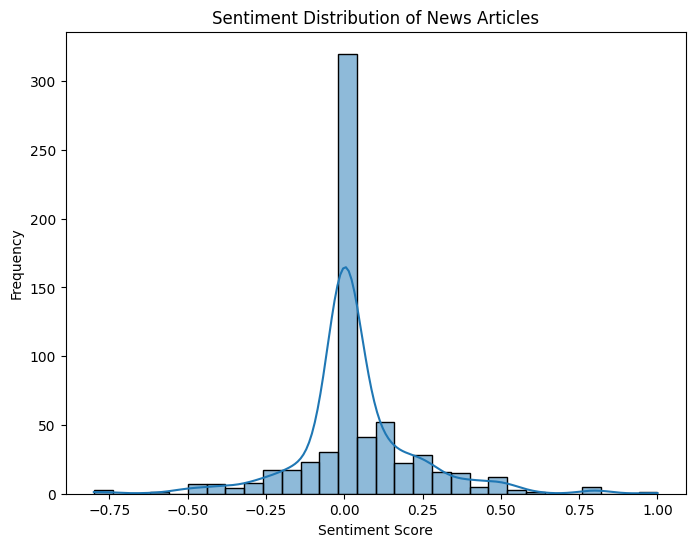

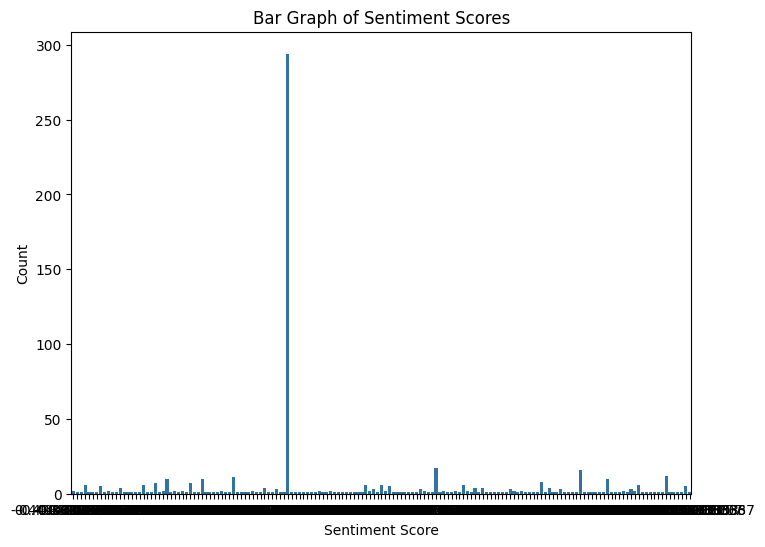

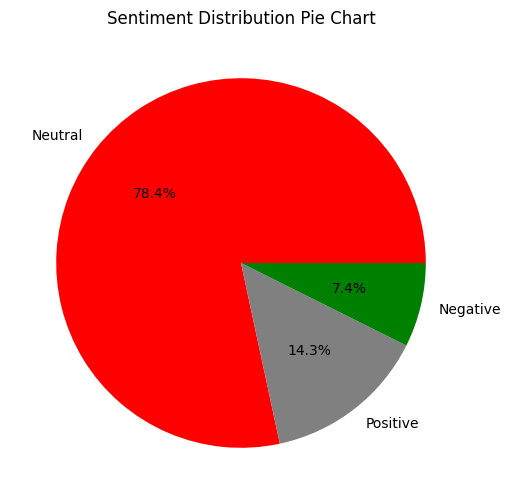

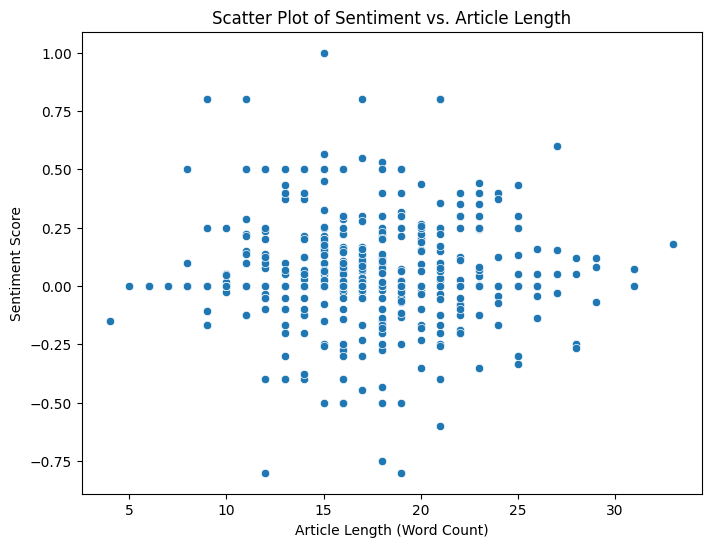

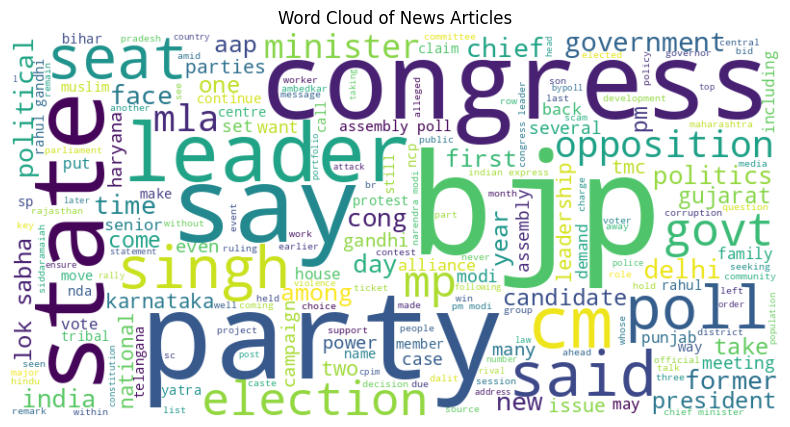

News dataset analysis complete: Sentiment trends, bar graph, pie chart, scatter plot, and word cloud generated.


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob

# Load dataset
df = pd.read_csv('/Indian Express News Scarped total page 500.csv')

# Drop unnecessary column
df.drop(columns=['Unnamed: 0', 'article_url', 'article_image_url'], inplace=True)

# Handle missing values
df.dropna(subset=['article_description'], inplace=True)

# Data Preprocessing
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_description'] = df['article_description'].apply(clean_text)

# Sentiment Analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_description'].apply(get_sentiment)

# Sentiment Distribution Visualization
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title("Sentiment Distribution of News Articles")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Sentiment Bar Graph
plt.figure(figsize=(8, 6))
sns.barplot(x=df['sentiment'].value_counts().index, y=df['sentiment'].value_counts())
plt.title("Bar Graph of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.show()

# Sentiment Pie Chart
plt.figure(figsize=(8, 6))
df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-1, -0.2, 0.2, 1], labels=['Negative', 'Neutral', 'Positive'])
df['sentiment_category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'gray', 'green'])
plt.title("Sentiment Distribution Pie Chart")
plt.ylabel('')
plt.show()

# Scatter Plot of Sentiment vs. Article Length
df['article_length'] = df['cleaned_description'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['article_length'], y=df['sentiment'])
plt.title("Scatter Plot of Sentiment vs. Article Length")
plt.xlabel("Article Length (Word Count)")
plt.ylabel("Sentiment Score")
plt.show()

# Word Cloud for Most Frequent Words
text_combined = ' '.join(df['cleaned_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of News Articles")
plt.show()

print("News dataset analysis complete: Sentiment trends, bar graph, pie chart, scatter plot, and word cloud generated.")

Columns in df1: Index(['Unnamed: 0', 'Date', 'User', 'Tweet', 'Likes', 'Retweets'], dtype='object')
Columns in df2: Index(['|last_updated|tweet_id|created_at|user_location|full_text|quote_count|reply_count|retweet_count|favorite_count|hashtags|user_mentions_screen_name|OfImportance|subject|ADJ|NOUN|VERB|ADV|Pos_ADJ|Neg_ADJ|Pos_NOUN|Neg_NOUN|Pos_VERB|Neg_VERB|Pos_ADV|Neg_ADV|City|State|District|Country|Pos_ADJ_count|Neg_ADJ_count|Pos_NOUN_count|Neg_NOUN_count|Pos_VERB_count|Neg_VERB_count|Pos_ADV_count|Neg_ADV_count|neg|neu|pos|compound|weighted_compound|weighted_compound_new'], dtype='object')


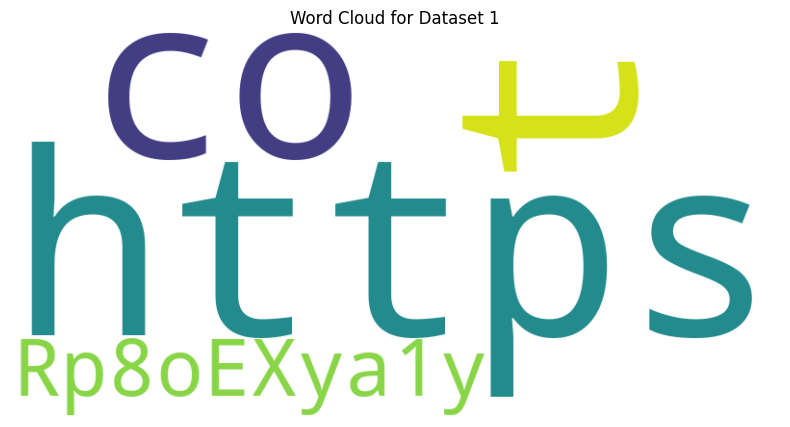

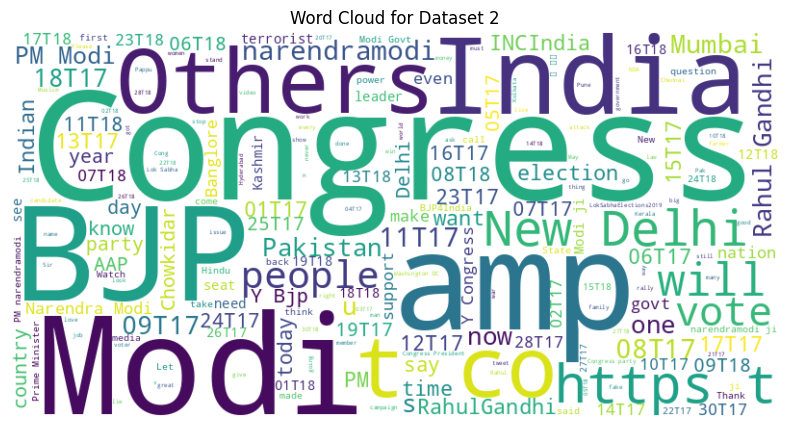

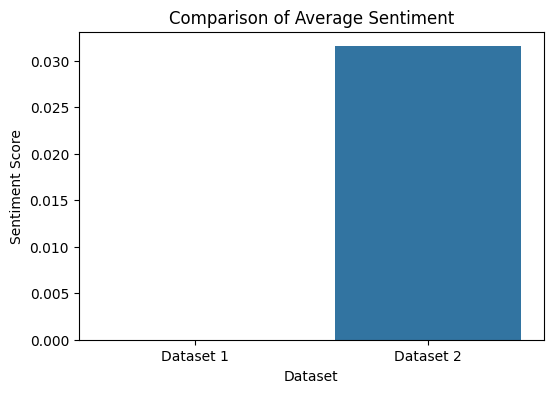

Analysis complete: Sentiment comparison and word clouds generated.


In [69]:
!pip install textblob wordcloud
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# Load datasets
# Use 'on_bad_lines' instead of 'errors' for pandas versions >= 1.3.0
df1 = pd.read_csv('/content/tweets.csv', encoding='utf-8', on_bad_lines='skip')
df2 = pd.read_csv('/content/11th_hour_political_tweets.csv', encoding='utf-8', on_bad_lines='skip')

# If using pandas version < 1.3.0, you might need to handle errors differently:
# try:
#     df1 = pd.read_csv('/content/tweets.csv', encoding='utf-8')
# except UnicodeDecodeError:
#     df1 = pd.read_csv('/content/tweets.csv', encoding='utf-8', engine='python')
# # Apply similar logic for df2

# Check the actual column names in your DataFrames
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)

# Assuming the text column is named 'tweet' in df2, and it might be something else or missing in df1
# Adjust the column name if it's different in your CSV
text_column_df1 = 'text' if 'text' in df1.columns else df1.columns[0]  # Get 'text' or the first column name
text_column_df2 = 'tweet' if 'tweet' in df2.columns else df2.columns[0] # Get 'tweet' or the first column name

# Ensure 'text' column (or its equivalent) exists in both datasets
if text_column_df1 not in df1.columns or text_column_df2 not in df2.columns:
    raise ValueError("One of the datasets does not contain the expected text column")

# Drop missing values in 'text' column (or its equivalent)
df1, df2 = df1[[text_column_df1]].dropna(), df2[[text_column_df2]].dropna()

# Sentiment analysis
df1['sentiment'] = df1[text_column_df1].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
df2['sentiment'] = df2[text_column_df2].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Function to generate and display word cloud
def plot_wordcloud(text_series, title):
    text = ' '.join(text_series.dropna().astype(str))
    if not text.strip():
        print(f"No valid text for {title}")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_wordcloud(df1[text_column_df1], "Word Cloud for Dataset 1")
plot_wordcloud(df2[text_column_df2], "Word Cloud for Dataset 2")

# Sentiment comparison
df_comparison = pd.DataFrame({
    'Dataset': ['Dataset 1', 'Dataset 2'],
    'Avg Sentiment': [df1['sentiment'].mean(), df2['sentiment'].mean()]
})

plt.figure(figsize=(6, 4))
sns.barplot(x='Dataset', y='Avg Sentiment', data=df_comparison)
plt.title("Comparison of Average Sentiment")
plt.ylabel("Sentiment Score")
plt.show()

print("Analysis complete: Sentiment comparison and word clouds generated.")